In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import xgboost as xgb
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Define your calculate_log_loss function
def calculate_log_loss(y_true, y_pred):
    eps = 1e-15
    y_pred = np.clip(y_pred, eps, 1 - eps)
    return -np.mean(y_true * np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))

In [ ]:
X = pd.read_csv('/content/drive/MyDrive/kevin/balanced_X_data.csv')
X.head()

,hour_of_day,day_of_the_week,device_ip,device_model,C14,device_id,site_id,C20,site_domain,C19,C21,app_id
0,19,23,972164,6111,4687,1773902,2546,100148,6124,39,32,8075
1,4,23,3644225,4962,21611,1918736,2546,100111,6124,297,61,9094
2,7,25,5303838,4908,21191,1918736,2546,100193,6124,161,71,5231
3,19,23,2540823,3826,17037,1918736,4251,-1,3977,39,16,8433
4,14,29,3817491,4485,9461,1918736,4736,-1,6228,1315,61,8433


In [ ]:
#reading the data in as csv
Y = pd.read_csv('/content/drive/MyDrive/kevin/balanced_Y_data.csv')
Y.head()

,click
0,0
1,0
2,0
3,1
4,0


In [ ]:
# Assuming 'data' is your DataFrame and 'target' is the name of the target variable
Y = Y['click']  # Target variable

In [ ]:
## Predicting using the best model
test = pd.read_csv('/content/drive/MyDrive/kevin/test_encoded_data.csv')

In [ ]:
#printing out the column names
col_names=X.columns
print(col_names)

Index(['hour_of_day', 'day_of_the_week', 'device_ip', 'device_model', 'C14',
       'device_id', 'site_id', 'C20', 'site_domain', 'C19', 'C21', 'app_id'],
      dtype='object')

In [ ]:
#printing out the test data columns
test_data_col_names=test.columns
print(test_data_col_names)

Index(['id', 'hour', 'C1', 'banner_pos', 'site_id', 'site_domain',
       'site_category', 'app_id', 'app_domain', 'app_category', 'device_id',
       'device_ip', 'device_model', 'device_type', 'device_conn_type', 'C14',
       'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'hour_of_day',
       'day_of_the_week'],
      dtype='object')

In [ ]:
#reducing the columns to the most important features
test_new = test[['hour_of_day','day_of_the_week','device_ip', 'device_model', 'C14', 'device_id', 'site_id', 'C20',
       'site_domain', 'C19', 'C21', 'app_id']]

In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.25, random_state=42)

Log Loss: 0.5729839205741882


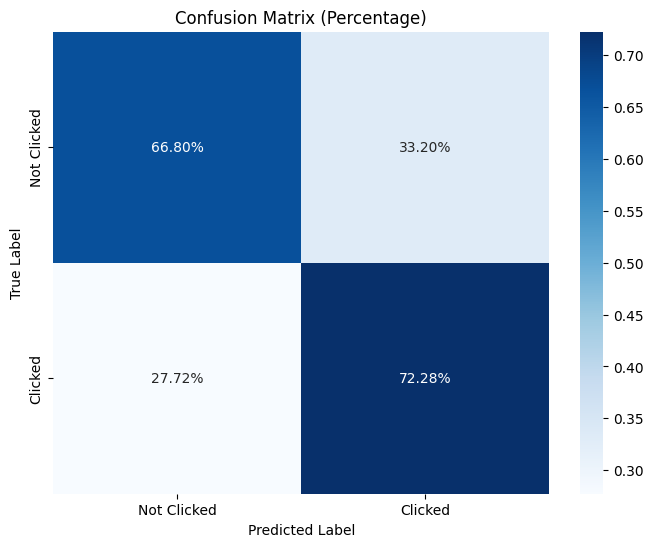

In [ ]:
# Initialize an XGBoost classifier
model = xgb.XGBClassifier(
    n_estimators=80,
    max_depth=20,
    learning_rate=0.1,
    objective='binary:logistic',
    n_jobs=-1,
    random_state=0
)

model.fit(X_train, y_train)
y_pred_prob = model.predict_proba(X_test)[:, 1]
log_loss = calculate_log_loss(y_test, y_pred_prob)
print(f'Log Loss: {log_loss}')

# Predict class labels based on a threshold
threshold = 0.5
y_pred_class = (y_pred_prob > threshold).astype(int)

# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred_class)

# Normalize the confusion matrix to show percentages
cm_percentage = cm / cm.sum(axis=1).reshape(-1, 1)

# Plotting the confusion matrix in percentage
plt.figure(figsize=(8, 6))
sns.heatmap(cm_percentage, annot=True, fmt='.2%', cmap='Blues', xticklabels=['Not Clicked', 'Clicked'], yticklabels=['Not Clicked', 'Clicked'])
plt.title('Confusion Matrix (Percentage)')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()


In [ ]:
#reading in submission file
data = pd.read_csv("/content/drive/MyDrive/AI ML Project/ProjectSubmission-TeamX.csv", dtype={"column1": str, "column2": float})

In [ ]:
#predict the probability of each click
data['P(click)'] = model.predict_proba(test_new)

In [ ]:
data.head()

,id,P(click)
0,3295858251275419735,0.827933
1,12281702837842634283,0.813753
2,4638380339534007785,0.957542
3,17039804736879076347,0.384957
4,5753064066292192109,0.554957


In [ ]:
data.iloc[:, 1] = data.iloc[:, 1].round(10).apply(lambda x: format(x, 'f'))
# Write out the data in the correct format
data.to_csv("/content/drive/MyDrive/Malik/ProjectSubmission-Team18-Output_submission.csv", index=False, float_format='%.10f')
